In [1]:
import os
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from utils.functions.func_plot_graphs import plot_graphs
from utils.functions.func_fix_date_format import fix_dates 
from utils.functions.func_fix_column_names import snake_case
from utils.functions.func_helper_print_colors import color_print
from utils.functions.func_helper_query_dataset import query_dataframe
from utils.functions.func_helper_duplicate_rows import print_duplicate_rows
from utils.functions.func_helper_convert_date_format import convert_date_format

In [2]:
# Loading dataset config CSV
base_path = os.getcwd()
config_path = os.path.join(base_path, "utils", "configs", "datasets_config.csv")
datasets_df = pd.read_csv(config_path)

# Convert CSV config into dictionary with full paths
dataset_paths = {
    row['name']: os.path.normpath(os.path.join(base_path, row['path']))
    for _, row in datasets_df.iterrows()
}

sunSpotsEarly_path = dataset_paths.get('sunSpotsEarly')
sunSpotsEarly = pd.read_csv(sunSpotsEarly_path, encoding='ISO-8859-1')

sunSpotsMonthly_path = dataset_paths.get('sunSpotsMonthly')
sunSpotsMonthly = pd.read_csv(sunSpotsMonthly_path, encoding='ISO-8859-1')

sunSpotsDaily_path = dataset_paths.get('sunSpotsDaily')
sunSpotsDaily = pd.read_csv(sunSpotsDaily_path, encoding='ISO-8859-1')

In [3]:
query_dataframe(sunSpotsEarly, filepath=sunSpotsEarly_path , encoding='ISO-8859-1')

       Encoding check:
                                                
        Filepath: C:\Users\georgi.petrov\DataScience\00.ExamProject\data\SN_yearly_total_V2.0.csv
        Encoding: ISO-8859-1
        Total lines in file (including header): 325
        Rows loaded in DataFrame: 324
                                                
                                                

   Dataset Summary:
   DataFrame dimensions: (324, 1)
                                                
                                                
                                                

   No missing values detected.
                                                
                                                
                                                

   Duplicate rows: 0
                                                
                                                
                                                

   
    Columns and data types:
      - 1700.5;   8.3; -1.0;  

In [4]:
query_dataframe(sunSpotsMonthly, filepath=sunSpotsMonthly_path , encoding='ISO-8859-1')

       Encoding check:
                                                
        Filepath: C:\Users\georgi.petrov\DataScience\00.ExamProject\data\SN_monthly_mean_total_V2.0.csv
        Encoding: ISO-8859-1
        Total lines in file (including header): 3319
        Rows loaded in DataFrame: 3318
                                                
                                                

   Dataset Summary:
   DataFrame dimensions: (3318, 1)
                                                
                                                
                                                

   No missing values detected.
                                                
                                                
                                                

   Duplicate rows: 0
                                                
                                                
                                                

   
    Columns and data types:
      - 1749;01;1749.

In [5]:
query_dataframe(sunSpotsDaily, filepath=sunSpotsDaily_path , encoding='ISO-8859-1')

       Encoding check:
                                                
        Filepath: C:\Users\georgi.petrov\DataScience\00.ExamProject\data\EISN_current.csv
        Encoding: ISO-8859-1
        Total lines in file (including header): 15
        Rows loaded in DataFrame: 14
                                                
                                                

   Dataset Summary:
   DataFrame dimensions: (14, 9)
                                                
                                                
                                                

   Missing values per column:
                                                
Unnamed: 8    14
dtype: int64
                                                
                                                
                                                

   Duplicate rows: 0
                                                
                                                
                                             

In [6]:
print(sunSpotsEarly.head(10))
print(sunSpotsEarly.dtypes)

# Check how many non-NaN values we have
print(sunSpotsEarly["year"].notna().sum(), "years parsed")
print(sunSpotsEarly["sunspot_number"].notna().sum(), "sunspot numbers parsed")

   1700.5;   8.3; -1.0;    -1;1
0  1701.5;  18.3; -1.0;    -1;1
1  1702.5;  26.7; -1.0;    -1;1
2  1703.5;  38.3; -1.0;    -1;1
3  1704.5;  60.0; -1.0;    -1;1
4  1705.5;  96.7; -1.0;    -1;1
5  1706.5;  48.3; -1.0;    -1;1
6  1707.5;  33.3; -1.0;    -1;1
7  1708.5;  16.7; -1.0;    -1;1
8  1709.5;  13.3; -1.0;    -1;1
9  1710.5;   5.0; -1.0;    -1;1
1700.5;   8.3; -1.0;    -1;1    object
dtype: object


KeyError: 'year'

In [7]:
df_yearly = sunSpotsEarly.copy()
df_yearly = df_yearly.iloc[:, 0].str.split(";", expand=True)
df_yearly.columns = ["year", "sunspot_number", "std_dev", "num_obs", "marker"]
df_yearly = df_yearly.apply(lambda col: col.str.strip())
df_yearly[["year", "sunspot_number", "std_dev", "num_obs"]] = df_yearly[["year", "sunspot_number", "std_dev", "num_obs"]].apply(pd.to_numeric, errors="coerce")

# --- MONTHLY ---
df_monthly = sunSpotsMonthly.copy()
df_monthly = df_monthly.iloc[:, 0].str.split(";", expand=True)
df_monthly.columns = ["year", "month", "decimal_year", "sunspot_number", "std_dev", "num_obs", "marker"]
df_monthly = df_monthly.apply(lambda col: col.str.strip())
df_monthly[["year", "month"]] = df_monthly[["year", "month"]].astype(int)
df_monthly[["decimal_year", "sunspot_number", "std_dev", "num_obs"]] = df_monthly[["decimal_year", "sunspot_number", "std_dev", "num_obs"]].apply(pd.to_numeric, errors="coerce")
df_monthly["date"] = pd.to_datetime(df_monthly[["year", "month"]].assign(day=1))

# --- DAILY ---
df_daily = sunSpotsDaily.copy()
df_daily.columns = ["year", "month", "day", "decimal_year", "sunspot_number", "std_dev", "g1", "g2", "misc"]
df_daily["date"] = pd.to_datetime(df_daily[["year", "month", "day"]])

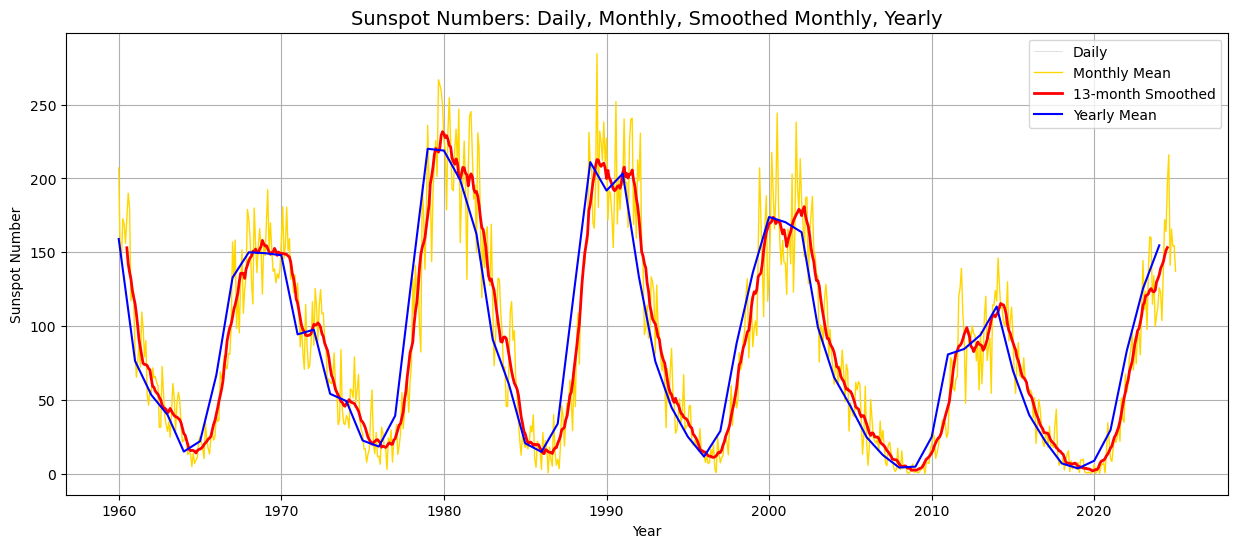

In [8]:
start_date = pd.Timestamp("1960-01-01")
end_date = pd.Timestamp("2025-01-31")

#start_date = pd.Timestamp("1978-01-01")
#end_date = pd.Timestamp("1992-12-31")

# Daily
df_daily_cut = df_daily[(df_daily["date"] >= start_date) & (df_daily["date"] <= end_date)]

# Monthly
df_monthly_cut = df_monthly[(df_monthly["date"] >= start_date) & (df_monthly["date"] <= end_date)]

# Yearly
df_yearly["date"] = pd.to_datetime(df_yearly["year"], format='%Y')
df_yearly_cut = df_yearly[(df_yearly["date"] >= start_date) & (df_yearly["date"] <= end_date)]

plt.figure(figsize=(15, 6))

# Daily
plt.plot(df_daily_cut["date"], df_daily_cut["sunspot_number"], color='lightgray', linewidth=0.5, label="Daily")

# Monthly
plt.plot(df_monthly_cut["date"], df_monthly_cut["sunspot_number"], color='gold', linewidth=1, label="Monthly Mean")

# Smoothed monthly (13-month running mean)
monthly_smoothed_cut = df_monthly_cut["sunspot_number"].rolling(window=13, center=True).mean()
plt.plot(df_monthly_cut["date"], monthly_smoothed_cut, color='red', linewidth=2, label="13-month Smoothed")

# Yearly — FIX: use df_yearly_cut
plt.plot(df_yearly_cut["date"], df_yearly_cut["sunspot_number"], color='blue', linewidth=1.5, label="Yearly Mean")

plt.title("Sunspot Numbers: Daily, Monthly, Smoothed Monthly, Yearly", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Sunspot Number")
plt.legend()
plt.grid(True)
plt.savefig('1960-2025_SunCycle.jpg', dpi=300) 
plt.show()

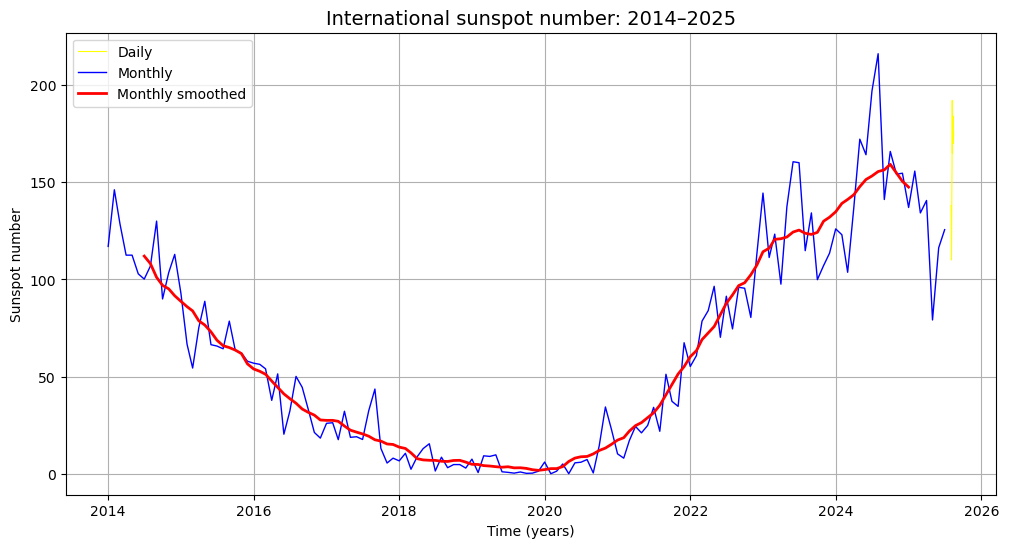

In [9]:
# Filter ranges for all datasets
start_date = "2014-01-01"
end_date = "2025-12-31"

# Daily
df_daily_cut = df_daily[(df_daily["date"] >= start_date) & (df_daily["date"] <= end_date)]

# Monthly
df_monthly_cut = df_monthly[(df_monthly["date"] >= start_date) & (df_monthly["date"] <= end_date)]

# Yearly (convert year to datetime first)
df_yearly["date"] = pd.to_datetime(df_yearly["year"], format='%Y')
df_yearly_cut = df_yearly[(df_yearly["date"] >= start_date) & (df_yearly["date"] <= end_date)]

# Plot
plt.figure(figsize=(12, 6))

# Daily (thin yellow)
plt.plot(df_daily_cut["date"], df_daily_cut["sunspot_number"], color='yellow', linewidth=0.8, label="Daily")

# Monthly (blue)
plt.plot(df_monthly_cut["date"], df_monthly_cut["sunspot_number"], color='blue', linewidth=1, label="Monthly")

# Smoothed monthly (red)
monthly_smoothed_cut = df_monthly_cut["sunspot_number"].rolling(window=13, center=True).mean()
plt.plot(df_monthly_cut["date"], monthly_smoothed_cut, color='red', linewidth=2, label="Monthly smoothed")

# Predictions (optional) — SC & CM
# plt.plot(sc_predictions["date"], sc_predictions["sunspot_number"], "r--", label="SC Predictions")
# plt.plot(cm_predictions["date"], cm_predictions["sunspot_number"], "r-.", label="CM Predictions")

plt.title("International sunspot number: 2014–2025", fontsize=14)
plt.xlabel("Time (years)")
plt.ylabel("Sunspot number")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
def decimal_year_to_datetime(decimal_year):
    year = int(decimal_year)
    fraction = decimal_year - year
    start_of_year = pd.Timestamp(year=year, month=1, day=1)
    next_year = pd.Timestamp(year=year+1, month=1, day=1)
    return start_of_year + (next_year - start_of_year) * fraction

sunSpotsEarly = sunSpotsEarly.iloc[:,0].astype(str).str.split(";", expand=True)
sunSpotsEarly.columns = ["decimal_year", "sunspot_number", "std_dev", "observations", "definitive"]
sunSpotsEarly = sunSpotsEarly.apply(lambda x: x.str.strip())

sunSpotsEarly = sunSpotsEarly.astype({
    "decimal_year": float,
    "sunspot_number": float,
    "std_dev": float,
    "observations": int,
    "definitive": int
})

sunSpotsEarly["decimal_year"] = sunSpotsEarly["decimal_year"].astype(float)
sunSpotsEarly["sunspot_number"] = sunSpotsEarly["sunspot_number"].astype(float)
sunSpotsEarly["date"] = sunSpotsEarly["decimal_year"].astype(float).apply(decimal_year_to_datetime)

# ---- CLEAN MONTHLY ----
sunSpotsMonthly = sunSpotsMonthly.iloc[:,0].str.split(";", expand=True)
sunSpotsMonthly.columns = ["year", "month", "decimal_year", "sunspot_number", "std_dev", "observations", "definitive"]
sunSpotsMonthly = sunSpotsMonthly.apply(lambda x: x.str.strip())

sunSpotsMonthly["year"] = sunSpotsMonthly["year"].astype(int)
sunSpotsMonthly["month"] = sunSpotsMonthly["month"].astype(int)
sunSpotsMonthly["sunspot_number"] = sunSpotsMonthly["sunspot_number"].astype(float)
sunSpotsMonthly["date"] = pd.to_datetime(sunSpotsMonthly[["year", "month"]].assign(day=1))

# ---- CLEAN DAILY ----
sunSpotsDaily.columns = ["year", "month", "day", "decimal_year", "sunspot_number", 
                         "std_dev", "observations", "definitive", "extra"]
sunSpotsDaily["date"] = pd.to_datetime(sunSpotsDaily[["year", "month", "day"]])
sunSpotsDaily["sunspot_number"] = sunSpotsDaily["sunspot_number"].astype(float)

# ---- CUT PERIOD ----
start_date = pd.Timestamp("2014-01-01")
end_date = pd.Timestamp("2025-01-31")

df_daily_cut = sunSpotsDaily[(sunSpotsDaily["date"] >= start_date) & (sunSpotsDaily["date"] <= end_date)]
df_monthly_cut = sunSpotsMonthly[(sunSpotsMonthly["date"] >= start_date) & (sunSpotsMonthly["date"] <= end_date)]
df_yearly_cut = sunSpotsEarly[(sunSpotsEarly["date"] >= start_date) & (sunSpotsEarly["date"] <= end_date)]

# ---- PLOT ----
plt.figure(figsize=(14, 6))

# Daily (lots of points, so thin line)
plt.plot(df_daily_cut["date"], df_daily_cut["sunspot_number"], color="gold", linewidth=0.3, label="Daily")

# Monthly
plt.plot(df_monthly_cut["date"], df_monthly_cut["sunspot_number"], color="green", linewidth=1, label="Monthly")

# Smoothed monthly (13-month)
monthly_smoothed = df_monthly_cut["sunspot_number"].rolling(window=13, center=True).mean()
plt.plot(df_monthly_cut["date"], monthly_smoothed, color="red", linewidth=2, label="Monthly smoothed")

# Yearly
plt.plot(df_yearly_cut["date"], df_yearly_cut["sunspot_number"], color="blue", linewidth=1.5, label="Yearly mean")

plt.title("International Sunspot Numbers (2014–2025)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Sunspot Number")
plt.legend()
plt.grid(True)
plt.show()